- (c) Ken-ichi Fukui, 2025/01/09
- MIT License

## Kerasを用いたMINISTデータの識別
- 要TensorFlow
 - Keras: https://keras.io/ja/

In [31]:
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# MNISTデータの読み込み
(X_trn, y_trn), (X_tst, y_tst) = mnist.load_data()

# 最初の2000点のみ使用
X_trn = X_trn[:2000]
X_tst = X_tst[:2000]
y_trn = y_trn[:2000]
y_tst = y_tst[:2000]

# 28x28の画素を28x28=784点の1次元に展開
X_trn = X_trn.reshape(2000, 784)
X_tst = X_tst.reshape(2000, 784)

# 値の範囲を[0,1]に変換 (Keras用)
X_trn = X_trn[:2000].astype('float32')/255
X_tst = X_tst[:2000].astype('float32')/255

# One-hot encoderによりクラスラベルをバイナリに変換 (Keras用)
# 例：1 -> [1,0,...,0], 2 -> [0,1,0,...]
y_trn  = to_categorical(y_trn, 10)
y_tst   = to_categorical(y_tst, 10)

# 入力データの次元数(=784画素)を取得
n_dim = X_trn.shape[1]

# 出力クラス数(=10クラス)
n_out = y_trn.shape[1]

### 学習履歴をプロットする関数

In [33]:
# Accuracyの履歴のプロット
def plot_history_acc(rec):
    plt.plot(rec.history['accuracy'],"o-",label="train")
    plt.plot(rec.history['val_accuracy'],"o-",label="test")
    plt.title('accuracy history')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

# 損失関数値の履歴のプロット
def plot_history_loss(rec):
    plt.plot(rec.history['loss'],"o-",label="train",)
    plt.plot(rec.history['val_loss'],"o-",label="test")
    plt.title('loss history')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()

### AutoEncoderの構築
- Relu（活性化関数）: f(x) = max(0,x)

In [34]:
ae = Sequential()
ae.add(Dense(500, input_dim = n_dim, activation='relu'))
ae.add(Dropout(0.2))
ae.add(Dense(250, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(125, activation='relu', name = 'encoder'))
ae.add(Dropout(0.5))
ae.add(Dense(250, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(500, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(n_dim, activation='relu'))

# 損失関数にMean Squared Error（平均二乗誤差），　パラメータの最適化にAdamを設定
# Adam(Adaptive moment estimation)は確率的最急降下法の一種．
ae.compile(loss = 'mse', optimizer ='adam')

# Kerasもfit()で学習を行う． ただし戻り値として学習履歴を返す．
records_ae = ae.fit(X_trn, X_trn,
                    epochs=250,
                    batch_size=200,
                    shuffle=True,
                    validation_data=(X_tst, X_tst))

Epoch 1/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0998 - val_loss: 0.0858
Epoch 2/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0727 - val_loss: 0.0805
Epoch 3/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0689 - val_loss: 0.0761
Epoch 4/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0666 - val_loss: 0.0723
Epoch 5/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0655 - val_loss: 0.0705
Epoch 6/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0660 - val_loss: 0.0678
Epoch 7/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0647 - val_loss: 0.0669
Epoch 8/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0643 - val_loss: 0.0663
Epoch 9/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0639 - val_loss: 0.0653
Epoch 10/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0623 - val_loss: 0.0640
Epoch 11/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0628 - val_loss: 0.0623
Epoch 12/250
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/ste

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Dense)                      │ (None, 125)                 │          31,375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 250)                 │          31,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 500)                 │         125,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 784)                 │         392,784 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,296,729 (12.58 MB)

 Trainable params: 1,098,909 (4.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,197,820 (8.38 MB)

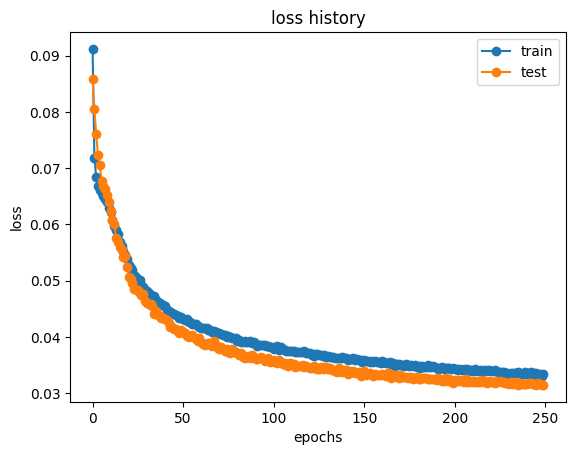

In [35]:
# 学習済み重みの保存
ae.save_weights('autoencoder.weights.h5')
# ネットワークの概要
ae.summary()
# 損失関数値の履歴のプロット
plot_history_loss(records_ae)

### AutoEncoderによる再構成画像の表示

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


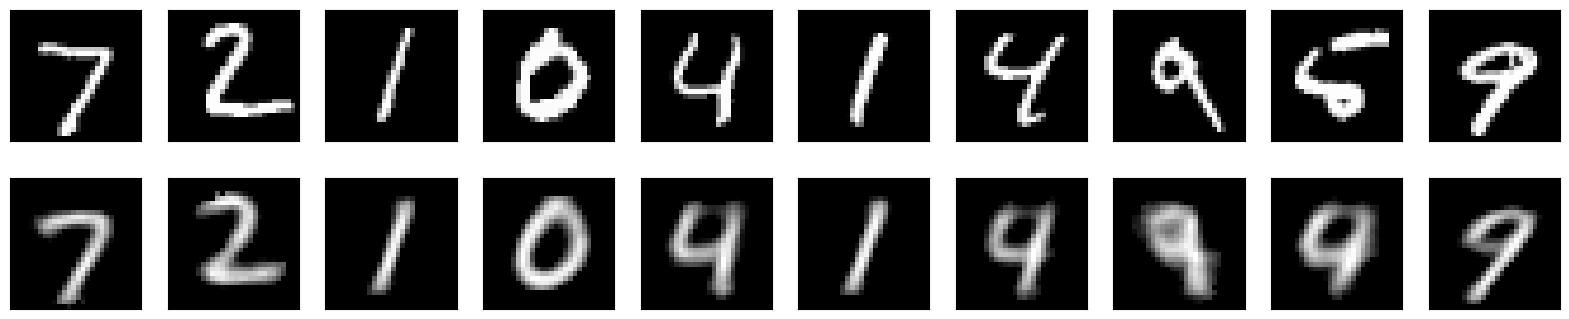

In [36]:
# テスト画像をAutoEncoderで変換
decoded_imgs = ae.predict(X_tst)

n = 10 #表示枚数
plt.figure(figsize=(20, 4))
for i in range(n):
    # 元画像の表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_tst[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 再構成画像の表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### AutoEncoderの学習結果を用いて深層ニューラルネットを構成（DNN）

In [37]:
# AutoEncoderの学習結果（Encoderの学習済み重み）を取得
h = ae.get_layer('encoder').output
# 最終段にクラス数の分の出力を持つsoftmax関数を追加
y = Dense(n_out, activation='softmax', name='predictions')(h)

# 入力から出力層までを繋ぐNNモデルを生成
dnn = Model(inputs=ae.inputs, outputs=y)

# 損失関数は交差エントロピーを使用． 最近は平均二乗誤差ではなく交差エントロピーが用いられている．
dnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

records_dnn = dnn.fit(X_trn, y_trn,
                epochs=50,
                batch_size=200,
                shuffle=True,
                validation_data=(X_tst, y_tst))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.2046 - loss: 2.2431 - val_accuracy: 0.5010 - val_loss: 1.9395
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5326 - loss: 1.6764 - val_accuracy: 0.6730 - val_loss: 1.3251
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7268 - loss: 1.0230 - val_accuracy: 0.7845 - val_loss: 0.8344
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8348 - loss: 0.6272 - val_accuracy: 0.8245 - val_loss: 0.6306
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8671 - loss: 0.4616 - val_accuracy: 0.8520 - val_loss: 0.5266
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8952 - loss: 0.3518 - val_accuracy: 0.8705 - val_loss: 0.4618
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9130 - loss: 0.2924 - val_accuracy: 0.8725 - val_loss: 0.4256
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9160 - loss: 0.2672 - val_accuracy: 0.8740 - v

Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Dense)                      │ (None, 125)                 │          31,375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 10)                  │           1,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,651,157 (6.30 MB)

 Trainable params: 550,385 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,100,772 (4.20 MB)

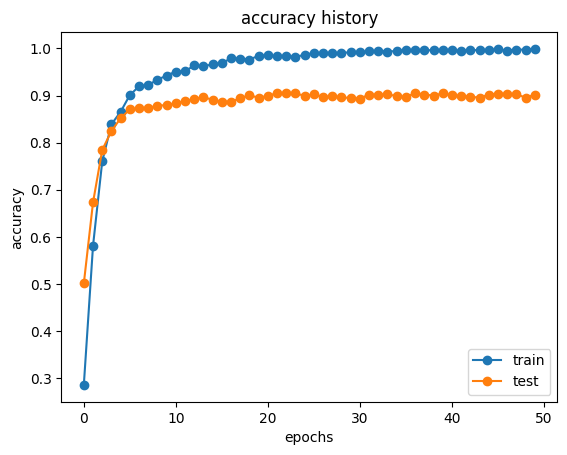

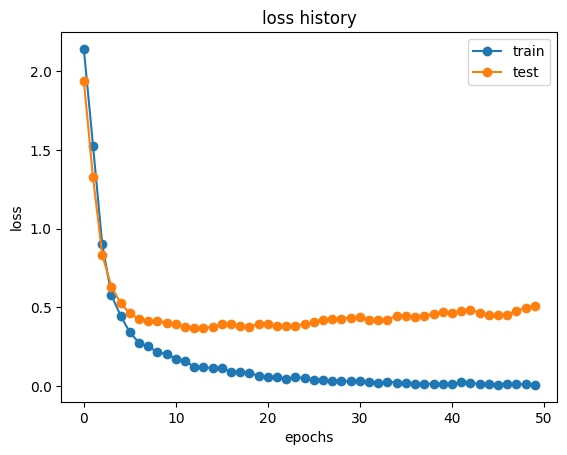

In [38]:
# ネットワークの概要
dnn.summary()
# 学習履歴のプロット
plot_history_acc(records_dnn)
plot_history_loss(records_dnn)

### AutoEncoderを使わない中間層1層の多層パーセプトロン（MLP）

In [39]:
mlp = Sequential()
mlp.add(Dense(500, input_dim = n_dim, activation='sigmoid'))
mlp.add(Dense(n_out, activation='softmax'))
mlp.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

records_mlp = mlp.fit(X_trn, y_trn,
                epochs=100,
                batch_size=200,
                validation_data=(X_tst, y_tst))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2777 - loss: 2.2457 - val_accuracy: 0.6565 - val_loss: 1.6751
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7388 - loss: 1.4295 - val_accuracy: 0.7255 - val_loss: 1.2419
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7928 - loss: 1.0172 - val_accuracy: 0.7550 - val_loss: 1.0099
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8297 - loss: 0.7945 - val_accuracy: 0.7680 - val_loss: 0.8646
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8528 - loss: 0.6363 - val_accuracy: 0.7980 - val_loss: 0.7735
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8728 - loss: 0.5708 - val_accuracy: 0.8020 - val_loss: 0.7091
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8707 - loss: 0.5475 - val_accuracy: 0.8175 - val_loss: 0.6636
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8865 - loss: 0.4756 - val_accuracy: 0.

In [40]:
# ネットワークの概要
mlp.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,192,532 (4.55 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 795,022 (3.03 MB)

### CNNを実装
- 参考：simple MNIST convnet
 - https://keras.io/examples/vision/mnist_convnet/

In [41]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

# 2次元の画像として扱うため28x28x1へ変換
X_trn_cnn = X_trn.reshape(X_trn.shape[0], 28, 28, 1)
X_tst_cnn = X_tst.reshape(X_tst.shape[0], 28, 28, 1)

cnn = Sequential()

In [42]:
# Conv2Dで畳み込み層を設定
# kernel_sizeでフィルタのパッチサイズを指定
# Conv2Dの最初の引数は特徴空間の数
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(Dropout(0.2))
# MaxPooling2Dでプーリング層を設定
# pool_sizeでパッチサイズを指定
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5))
# もう一段同様に畳み込み層とプーリング層を追加
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5))
# Flatten()で2次元の特徴空間を1次元化
cnn.add(Flatten())
# 最後は全結合層を加える
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
# 出力数がクラス数分の出力層
cnn.add(Dense(len(y_trn[0]), activation='softmax'))

In [43]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

records_cnn = cnn.fit(X_trn_cnn, y_trn,
                   epochs=100,
                   batch_size=200,
                   shuffle=True,
                   validation_data=(X_tst_cnn, y_tst))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.1128 - loss: 2.4427 - val_accuracy: 0.4065 - val_loss: 2.2483
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.1974 - loss: 2.1962 - val_accuracy: 0.6060 - val_loss: 2.2023
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.3035 - loss: 2.0587 - val_accuracy: 0.6970 - val_loss: 2.0494
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.4140 - loss: 1.7931 - val_accuracy: 0.7265 - val_loss: 1.7121
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.4687 - loss: 1.5340 - val_accuracy: 0.7565 - val_loss: 1.4094
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.5634 - loss: 1.3085 - val_accuracy: 0.7710 - val_loss: 1.2677
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.5851 - loss: 1.1946 - val_accuracy: 0.7895 - val_loss: 1.2079
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6602 - loss: 1.0709 - val_accu

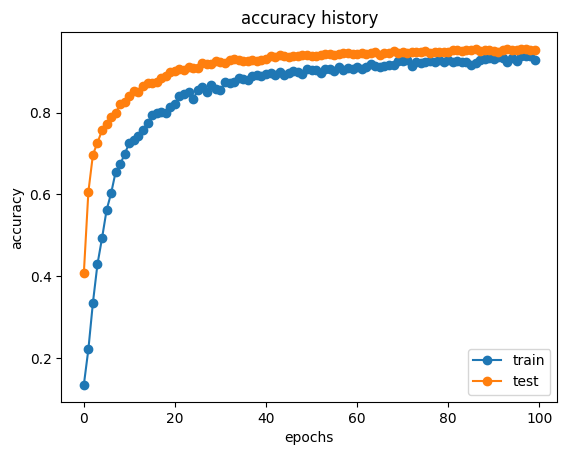

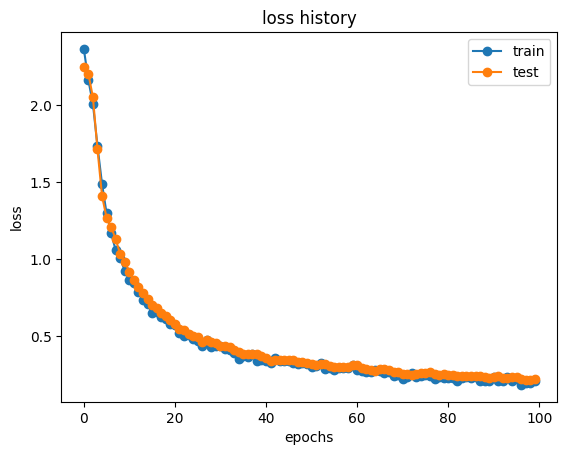

In [44]:
plot_history_acc(records_cnn)
plot_history_loss(records_cnn)

### MLP, DNN, CNNのAccuracyの比較

In [45]:
loss_mlp, acc_mlp = mlp.evaluate(X_tst, y_tst, verbose=0)
loss_dnn, acc_dnn = dnn.evaluate(X_tst, y_tst, verbose=0)
loss_cnn, acc_cnn = cnn.evaluate(X_tst_cnn, y_tst, verbose=0)

print('Test accuracy (MLP):', acc_mlp)
print('Test accuracy (DNN):', acc_dnn)
print('Test accuracy (CNN):', acc_cnn)

Test accuracy (MLP): 0.8550000190734863
Test accuracy (DNN): 0.9020000100135803
Test accuracy (CNN): 0.9539999961853027
